# Análise de Aluguéis Residenciais – Rio de Janeiro

## Objetivo

Analisar e tratar uma base de dados de valores de aluguel de imóveis residenciais no Rio de Janeiro, utilizando Python, através de extração, limpeza e manipulação dos dados para análise
econômica e apoio à tomada de decisão.

In [6]:
import numpy as np
import pandas as pd



Leitura da Base de Dados

In [10]:
dados = pd.read_csv('/content/alugueisRJ.csv.csv', sep=';')



In [11]:
dados.info()
dados.describe()

# Inspeção inicial para identificar caracteristicas e possíves inconsistências.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
count,32960.000000,32960.000000,32960.000000,32960.000000,3.294300e+04,2.886700e+04,2.272300e+04
mean,1.771390,1.749059,0.665777,231.901547,1.295266e+04,2.388062e+03,2.364410e+03
std,1.717869,20.380402,1.176525,1135.254152,6.675220e+05,3.918496e+04,1.795641e+05
min,0.000000,0.000000,0.000000,0.000000,7.500000e+01,1.000000e+00,1.000000e+00
25%,0.000000,0.000000,0.000000,55.000000,1.500000e+03,5.900000e+02,1.100000e+02
50%,2.000000,1.000000,0.000000,87.000000,2.800000e+03,9.900000e+02,2.500000e+02
75%,3.000000,2.000000,1.000000,170.000000,6.500000e+03,1.800000e+03,6.970000e+02
max,100.000000,1966.000000,70.000000,90000.000000,1.200000e+08,6.552570e+06,2.705307e+07


In [17]:
dados.columns

Index(['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor',
       'Condominio', 'IPTU'],
      dtype='object')

In [20]:
dados[['Tipo', 'Quartos','Valor']]

,Tipo,Quartos,Valor
0,Quitinete,1,1700.0
1,Casa,2,7000.0
2,Conjunto Comercial/Sala,0,5200.0
3,Apartamento,1,800.0
4,Apartamento,1,800.0
...,...,...,...
32955,Quitinete,0,800.0
32956,Apartamento,3,1800.0
32957,Apartamento,2,1400.0
32958,Apartamento,2,3000.0


Tratamento e filtragem de dados

In [25]:
dados.isnull()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...
32955,False,False,False,False,False,False,False,False,False
32956,False,False,False,False,False,False,False,False,False
32957,False,False,False,False,False,False,False,False,False
32958,False,False,False,False,False,False,False,False,True


In [26]:
dados.isnull().sum()

,0
Tipo,0
Bairro,0
Quartos,0
Vagas,0
Suites,0
Area,0
Valor,17
Condominio,4093
IPTU,10237


In [27]:
dados.fillna(0, inplace=True)

In [28]:
dados.isnull().sum()

,0
Tipo,0
Bairro,0
Quartos,0
Vagas,0
Suites,0
Area,0
Valor,0
Condominio,0
IPTU,0


Removendo registros


In [30]:
dados.query('Valor == 0 | Condominio == 0')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0
10,Apartamento,Centro,1,0,0,36,1200.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
32914,Loja/Salão,Campo Grande,0,0,0,160,2650.0,0.0,0.0
32928,Loja/Salão,Leblon,0,0,0,68,25000.0,0.0,1113.0
32929,Loja/Salão,Freguesia (Jacarepaguá),0,0,0,80,5800.0,0.0,215.0
32931,Casa,Centro,5,0,1,160,5000.0,0.0,80.0


In [31]:
dados.query('Valor == 0 | Condominio == 0').index

Index([    1,     5,     7,     8,    10,    16,    18,    31,    35,    76,
       ...
       32893, 32897, 32899, 32911, 32912, 32914, 32928, 32929, 32931, 32954],
      dtype='int64', length=4106)

In [33]:
registros_remover = dados.query('Valor == 0 | Condominio == 0').index
dados.drop(registros_remover, axis=0, inplace=True)
dados.query('Valor == 0 | Condominio == 0')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU


In [36]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0


Filtros

In [38]:
dados['Tipo'].value_counts()

,count
Tipo,
Apartamento,18780
Conjunto Comercial/Sala,6437
Casa de Condomínio,901
Loja/Salão,819
Quitinete,772
Flat,433
Casa,210
Loja Shopping/ Ct Comercial,210
Casa de Vila,95


In [41]:
contagem_tipos = dados['Tipo'].value_counts()
media_valor_por_tipo = dados.groupby('Tipo')['Valor'].mean()

# Criar um DataFrame combinando as duas Series
analise_por_tipo = pd.DataFrame({
    'Contagem': contagem_tipos,
    'Valor Médio': media_valor_por_tipo
})

analise_por_tipo['Valor Médio'] = analise_por_tipo['Valor Médio'].round(2)

analise_por_tipo

,Contagem,Valor Médio
Tipo,,
Apartamento,18780,4805.30
Box/Garagem,20,290.00
Casa,210,10136.00
Casa Comercial,31,15509.68
Casa de Condomínio,901,12121.26
Casa de Vila,95,2044.74
Conjunto Comercial/Sala,6437,13761.24
Flat,433,4461.00
Galpão/Depósito/Armazém,68,59298.68


1) Apartamentos com 1 quarto e aluguel menor que R$1200,00

In [44]:
dados['Quartos'] == 1
selecao1 = dados['Quartos'] == 1
dados['Valor'] < 1200
selecao2 = dados['Valor'] < 1200
selecao1_2 = selecao1 & selecao2
dados[selecao1_2]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
28,Apartamento,Tijuca,1,0,0,48,750.0,772.0,25.0
54,Apartamento,Centro,1,0,0,27,750.0,371.0,19.0
94,Apartamento,Centro,1,1,0,37,1100.0,540.0,900.0
...,...,...,...,...,...,...,...,...,...
32714,Apartamento,Botafogo,1,0,0,21,1000.0,282.0,25.0
32763,Quitinete,Glória,1,0,0,10,400.0,107.0,10.0
32818,Quitinete,Flamengo,1,0,0,23,900.0,605.0,0.0
32844,Quitinete,Centro,1,0,0,24,1100.0,323.0,0.0


In [46]:
dados_1 = dados[selecao1_2]


2. Apartamentos com pelo menos 2 quartos, com aluguel de até R$3.000 e área maior que 70m

In [45]:
selecao = (dados['Quartos'] >= 2) & (dados['Valor'] < 3000) & (dados['Area'] > 70)
dados[selecao]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
12,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
21,Apartamento,Tijuca,2,1,0,110,1900.0,700.0,138.0
24,Apartamento,Tijuca,2,1,0,78,2000.0,700.0,0.0
32,Apartamento,Botafogo,2,1,0,76,2500.0,740.0,0.0
36,Apartamento,Recreio dos Bandeirantes,3,1,1,105,2300.0,648.0,0.0
...,...,...,...,...,...,...,...,...,...
32934,Apartamento,Jacarepaguá,2,1,1,78,2200.0,790.0,180.0
32940,Apartamento,Barra da Tijuca,2,1,1,85,2250.0,1561.0,197.0
32941,Apartamento,Barra da Tijuca,3,2,0,98,2300.0,887.0,177.0
32944,Apartamento,Recreio dos Bandeirantes,3,2,1,88,1550.0,790.0,0.0


In [47]:
dados2 = dados[selecao]

Manipulando dados


In [48]:
# Criando coluna numérica com custo mensal
dados['Valor_por_mes'] = dados['Valor'] + dados['Condominio']
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1601.0


In [49]:
# Criando coluna numérica com custo anual
dados['Valor_por_ano'] = dados['Valor_por_mes'] * 12 + dados['IPTU']
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,12360.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1601.0,19229.0


In [50]:
# Criando coluna com categoria
dados['Descricao'] = dados['Tipo'] + ' em ' + dados['Bairro']
dados.head()


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano,Descricao
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete em Copacabana
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala em Barra da Tijuca
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento em Centro
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,12360.0,Apartamento em Higienópolis
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1601.0,19229.0,Apartamento em Cachambi


Estatísticas descritivas


In [51]:
custo_mes = dados['Valor_por_mes']
custo_ano = dados['Valor_por_ano']

# Calculando estatísticas para 'Valor_por_mes'
media_mes = custo_mes.mean()
mediana_mes = custo_mes.median()
desvio_padrao_mes = custo_mes.std()

# Calculando estatísticas para 'Valor_por_ano'
media_ano = custo_ano.mean()
mediana_ano = custo_ano.median()
desvio_padrao_ano = custo_ano.std()

print(f"Estatísticas para Custo Mensal:\nMédia: {media_mes:.2f}, Mediana: {mediana_mes:.2f}, Desvio Padrão: {desvio_padrao_mes:.2f}")
print(f"Estatísticas para Custo Anual:\nMédia: {media_ano:.2f}, Mediana: {mediana_ano:.2f}, Desvio Padrão: {desvio_padrao_ano:.2f}")

Estatísticas para Custo Mensal:
Média: 9943.36, Mediana: 3790.00, Desvio Padrão: 57125.54
Estatísticas para Custo Anual:
Média: 120049.96, Mediana: 45687.50, Desvio Padrão: 686060.28


Gráfico demonstrativo de valores por tipo



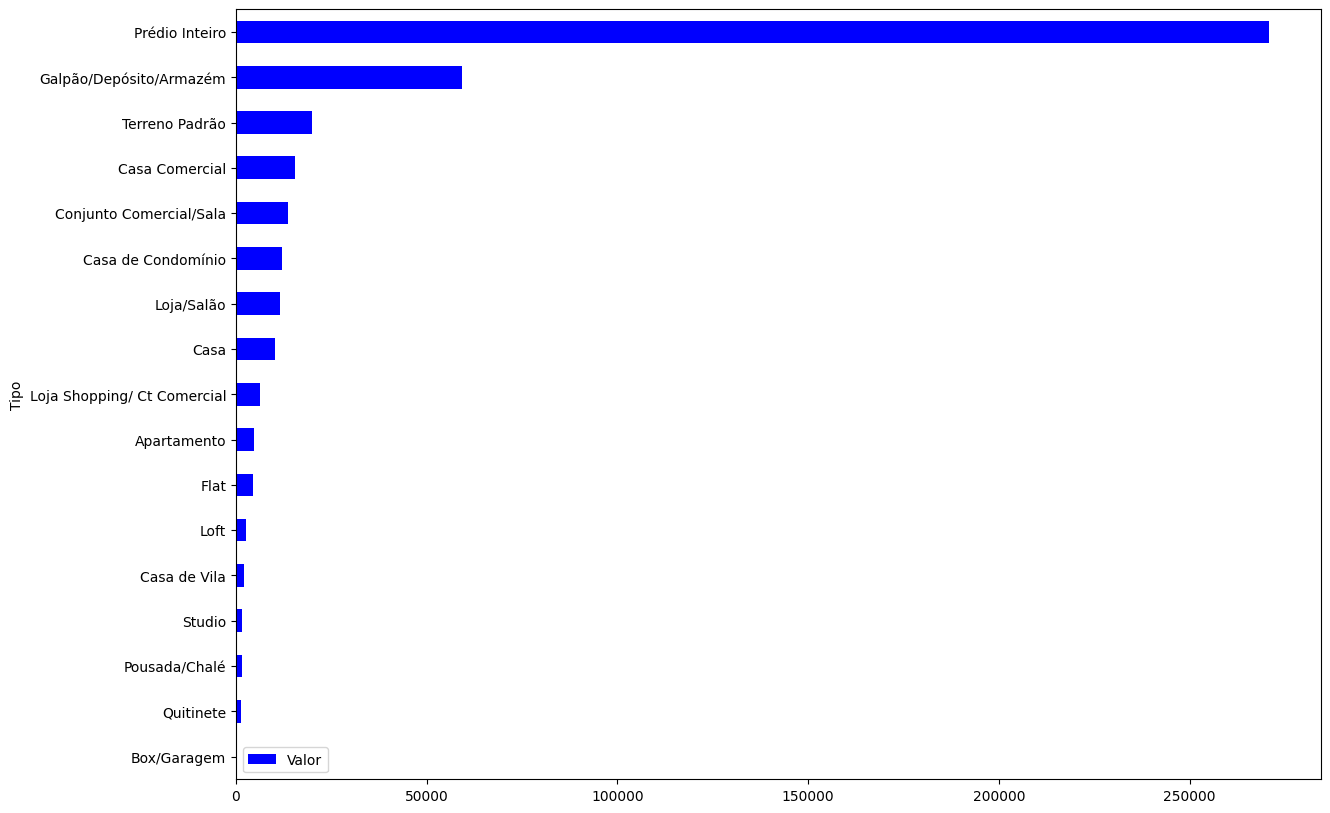

In [55]:
dados_preco_tipo = dados.groupby('Tipo')[['Valor']].mean().sort_values('Valor')

dados_preco_tipo.plot(kind='barh', figsize=(14, 10), color ='blue');

Salvando dados

In [61]:
dados.to_csv('dados_imoveis_RJ.csv', index= False, sep = ';')


In [62]:
pd.read_csv('dados_imoveis_RJ.csv', sep = ';')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano,Descricao
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete em Copacabana
1,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala em Barra da Tijuca
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento em Centro
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,12360.0,Apartamento em Higienópolis
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1601.0,19229.0,Apartamento em Cachambi
...,...,...,...,...,...,...,...,...,...,...,...,...
28849,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,1150.0,13825.0,Quitinete em Centro
28850,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2600.0,31240.0,Apartamento em Jacarepaguá
28851,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1909.0,22945.0,Apartamento em São Francisco Xavier
28852,Apartamento,Leblon,2,0,0,70,3000.0,760.0,0.0,3760.0,45120.0,Apartamento em Leblon


O projeto realizou a limpeza, o tratamento e a análise exploratória dos valores de aluguel de imóveis no Rio de Janeiro, culminando na geração de uma base de dados tratada, pronta para uso em análises econômicas, financeiras ou de
mercado imobiliário.